<a href="https://colab.research.google.com/github/mewadashreya/Text_Analysis/blob/master/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the python file includes the basic exploratory data analyis of text file which includes :


1.Rating of the Apps Distribution:

2.Review Length Distribution:

3.Word Count Distribution:. 

4.Count of Reviews Per Apps:

5.Text Preprocessing

6.N-grams


In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')          ###download the stopwords package with all the stopwords
nltk.download('all')    #####download all the packages of nltk
import string
punct = set(string.punctuation)             
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping co

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [3]:

import matplotlib as plt
from plotly.offline import iplot
import plotly.graph_objs as go


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
import warnings 
warnings.filterwarnings('ignore')
import plotly.io as pio
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30

from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
pio.renderers
pio.renderers.default = 'colab'

In [5]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/all_reviews_pharma.csv')

In [6]:
dataset[0:5]


,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,Body,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEUAlT3aNFOq_qDGdrkx3Y7Vh_OuGNTJhhQEpu...,English,NaN,3,14/11/19,Dwayne Young,NaN,"Nice, when it works. Freezes a lot and haven't...",NaN,NaN,negative,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN
1,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEFEWZYf5R3YxfFOH7NxwCR5YqNMwWkDYaCx_t...,English,NaN,1,14/11/19,A Google user,NaN,you wanted to chang password so i did 2 months...,NaN,NaN,negative,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN
2,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOGWujtwjnGQWIfIY9dCQt9lOTe0PQOkCnQJq8W...,Spanish,NaN,5,14/11/19,Maira Hernandez,NaN,Me encanta,NaN,NaN,positive,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN
3,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOFLuT3TRokZG5rCSA0UnWS_arVPoS1Z-68nrPT...,Spanish,NaN,5,14/11/19,dulce arredondo,NaN,El mejor de los lugares para mis compras,NaN,NaN,positive,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN
4,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOElKB7K7sVoh4lP2wHS_hVfTSFRWtXDOB5X0Xz...,Spanish,NaN,4,14/11/19,Olga Rosales,NaN,La app es muy buena pero en ocaciones no se ap...,NaN,NaN,positive,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.columns


Index(['App', 'Store', 'App ID', 'Review ID', 'Country', 'Version', 'Rating',
       'Date', 'Author', 'Subject', 'Body', 'Translated Subject',
       'Translated Body', 'Sentiment', 'Device', 'Language', 'OS Version',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21'],
      dtype='object')

In [8]:
dataset.drop(['Translated Subject','Translated Body','Device','OS Version',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21'],axis=1,inplace = True)

In [58]:
dataset[0:10]

,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,Body,Sentiment,Language
0,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEUAlT3aNFOq_qDGdrkx3Y7Vh_OuGNTJhhQEpu...,English,NaN,3,14/11/19,Dwayne Young,NaN,"Nice, when it works. Freezes a lot and haven't...",negative,English
1,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEFEWZYf5R3YxfFOH7NxwCR5YqNMwWkDYaCx_t...,English,NaN,1,14/11/19,A Google user,NaN,you wanted to chang password so i did 2 months...,negative,English
2,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOGWujtwjnGQWIfIY9dCQt9lOTe0PQOkCnQJq8W...,Spanish,NaN,5,14/11/19,Maira Hernandez,NaN,Me encanta,positive,Spanish
3,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOFLuT3TRokZG5rCSA0UnWS_arVPoS1Z-68nrPT...,Spanish,NaN,5,14/11/19,dulce arredondo,NaN,El mejor de los lugares para mis compras,positive,Spanish
4,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOElKB7K7sVoh4lP2wHS_hVfTSFRWtXDOB5X0Xz...,Spanish,NaN,4,14/11/19,Olga Rosales,NaN,La app es muy buena pero en ocaciones no se ap...,positive,Spanish
5,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOH9PH3pBFewA2p17uIe-Jh9J2-wjhD4YRImVIf...,Spanish,NaN,5,14/11/19,Miguel Medrano,NaN,Es la mejor farmacia y mi preferida soy client...,positive,Spanish
6,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOHQXlDMAFlxY5jmhr8QzxurnTZuaHRim4vTQzr...,English,NaN,1,14/11/19,Jessica Cummings,NaN,Worst app ever cannot access my prescriptions ...,negative,English
7,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOFXc99GKMgftnFmPKNXD5fcxRfq_umWo8Q3Ok2...,English,NaN,1,14/11/19,Steve Jordan,NaN,Doesn't work for me. Have it for the free deli...,negative,English
8,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOGqUmqRlizC14iDaRxkMN9v-zXVHSwn7GWA34H...,Spanish,NaN,1,14/11/19,Zaira Gonzalez,NaN,No sirve,negative,Spanish
9,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEs2ebnYBponINvdBPD_T5QXjGFJqOne8qnSS_...,Spanish,NaN,5,14/11/19,Clarisa Colín,NaN,Super práctica.....,positive,Spanish


In [10]:
dataset['Body']

0        Nice, when it works. Freezes a lot and haven't...
1        you wanted to chang password so i did 2 months...
2                                               Me encanta
3                 El mejor de los lugares para mis compras
4        La app es muy buena pero en ocaciones no se ap...
                               ...                        
48213                                          Works great
48214                  So much easier than phone! Love it!
48215    Relatively easy to use, and provides what is n...
48216    User friendly and easy for people who are not ...
48217           So convenient. Efficient, many thank yous.
Name: Body, Length: 48218, dtype: object

In [11]:
df = pd.DataFrame(dataset)

Filter out the Non-English Reviews for analysis:

In [12]:
english_df = df[df.Language == "English"]

In [13]:
english_df[0:5]

,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,Body,Sentiment,Language
0,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEUAlT3aNFOq_qDGdrkx3Y7Vh_OuGNTJhhQEpu...,English,NaN,3,14/11/19,Dwayne Young,NaN,"Nice, when it works. Freezes a lot and haven't...",negative,English
1,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOEFEWZYf5R3YxfFOH7NxwCR5YqNMwWkDYaCx_t...,English,NaN,1,14/11/19,A Google user,NaN,you wanted to chang password so i did 2 months...,negative,English
6,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOHQXlDMAFlxY5jmhr8QzxurnTZuaHRim4vTQzr...,English,NaN,1,14/11/19,Jessica Cummings,NaN,Worst app ever cannot access my prescriptions ...,negative,English
7,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOFXc99GKMgftnFmPKNXD5fcxRfq_umWo8Q3Ok2...,English,NaN,1,14/11/19,Steve Jordan,NaN,Doesn't work for me. Have it for the free deli...,negative,English
11,CVS/pharmacy,Google Play,com.cvs.launchers.cvs,gp:AOqpTOFR4NtSMrKz9U0BiSPhmjNFcMfBTKsiHzCanFw...,English,NaN,5,14/11/19,Martini Vandagriff,NaN,Fast an d helpful,positive,English


Finding the length of the reviews for seeking the longest number of reviews:


In [35]:
len(english_df)

45669

***Rating of the Apps Distribution:***

In [33]:
df2 = pd.DataFrame({'Rating':['1', '2', '3', '4', '5'], 'count':[len(english_df[(english_df['Rating'] == 1)]), len(english_df[(english_df['Rating'] == 2)]), 
len(english_df[(english_df['Rating'] == 3)]), len(english_df[(english_df['Rating'] == 4)]), len(english_df[(english_df['Rating'] == 5)])]})

In [34]:
fig = px.bar(df2, y="count",x="Rating",color="Rating",
             color_discrete_map={
                "1": "red",
                "2": "green",
                "3": "blue",
                "4": "goldenrod",
                "5": "magenta"},
             title="Rating of the Apps Distribution",
             template="plotly_dark"
            )
fig.show()

Perfectoo!!! Our number of Reviews are around *45K*.

***Review Length Distribution:*** 




In [15]:
english_df['review_len'] = english_df['Body'].str.len()

In [16]:
english_df['review_len'][0:5]

0     140.0
1     134.0
6     145.0
7     103.0
11     17.0
Name: review_len, dtype: float64

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'review_length')

Text(0, 0.5, 'Frequency')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]), <a list of 11 Text major ticklabel objects>)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Review Length Distribution')

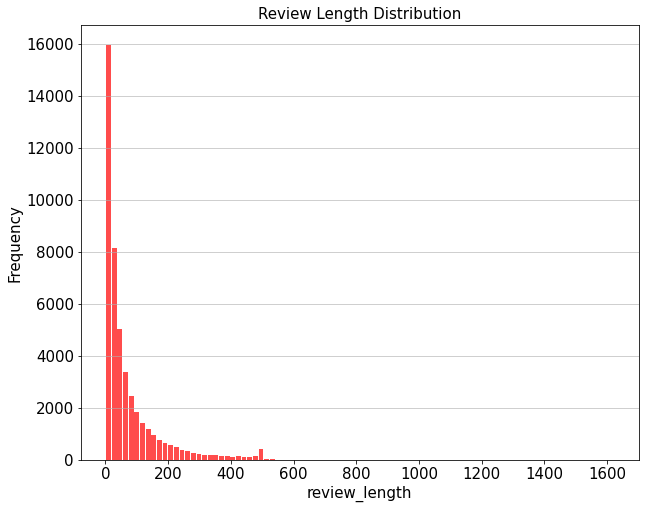

In [17]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=english_df["review_len"], bins=90, color='red',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('review_length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Review Length Distribution',fontsize=15)
plt.show()

In [18]:
english_df["review_len"].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Length Distribution')

***Word Count Distribution:.***

In [19]:
english_df['word_count'] = english_df['Body'].apply(lambda x: len(str(x).split()))
english_df['word_count']

0        24
1        30
6        27
7        20
11        4
         ..
48213     2
48214     7
48215     9
48216    11
48217     6
Name: word_count, Length: 45669, dtype: int64

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Word Count of the Reviews')

Text(0, 0.5, 'Frequency')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Count of the Reviews')

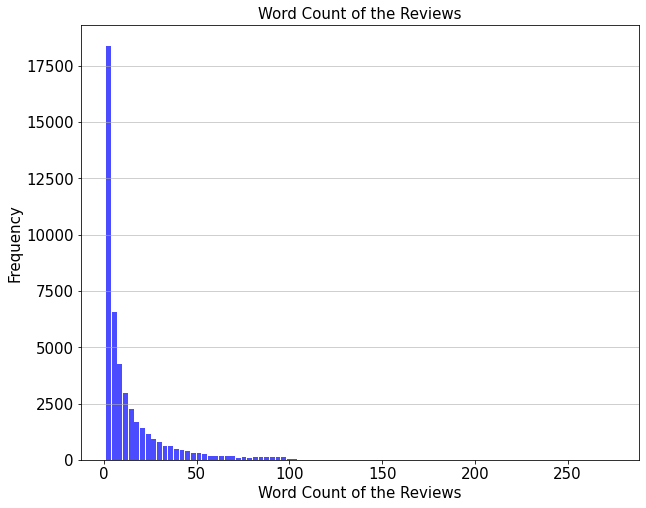

In [30]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=english_df["word_count"], bins=90, color='blue',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Word Count of the Reviews',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Word Count of the Reviews',fontsize=15)
plt.show()

In [27]:
english_df["word_count"].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

***Count of Reviews Per Apps:***


In [57]:
# rtt = english_df.groupby(['App', 'Body'])
# rtt.count()
english_df.groupby('App').count()['Body'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Count of the Reviews per App', xTitle='Apps')

In [60]:
# # english_df.Sentiment.positive 
# english_df[english_df['Recommended'] == "1"] = english_df[english_df.Sentiment == "positive"]

Using [TextBlob](https://textblob.readthedocs.io/en/dev/) to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.


In [73]:

def sentiment_calc(Body):
    try:
        return TextBlob(Body).sentiment.polarity
    except:
        return None

english_df['polarity'] = english_df['Body'].apply(sentiment_calc)

In [76]:
english_df[['polarity','Body']][0:5]

,polarity,Body
0,0.55,"Nice, when it works. Freezes a lot and haven't..."
1,-0.10,you wanted to chang password so i did 2 months...
6,-0.50,Worst app ever cannot access my prescriptions ...
7,0.40,Doesn't work for me. Have it for the free deli...
11,0.20,Fast an d helpful


In [81]:
english_df["polarity"].iplot(
    kind='hist',
    bins=100,
    xTitle='Polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

[Parts Of Speech Reference:](`https://https://en.wikipedia.org/wiki/Part-of-speech_tagging`) is a process of assigning parts of speech to each word, such as noun, verb, adjective, etc



In [84]:
blob = TextBlob(str(english_df['Body']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

Density Jointplot of Sentiment Polarity vs. Rating

In [85]:
# trace1 = go.Scatter(
#     x=english_df['polarity'], y=english_df['Rating'], mode='markers', name='points',
#     marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
# )
# trace2 = go.Histogram2dContour(
#     x=english_df['polarity'], y=english_df['Rating'], name='density', ncontours=20,
#     colorscale='Hot', reversescale=True, showscale=False
# )
# trace3 = go.Histogram(
#     x=english_df['polarity'], name='Sentiment polarity density',
#     marker=dict(color='rgb(102,0,0)'),
#     yaxis='y2'
# )
# trace4 = go.Histogram(
#     y=english_df['Rating'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
#     xaxis='x2'
# )
# data = [trace1, trace2, trace3, trace4]

# layout = go.Layout(
#     showlegend=False,
#     autosize=False,
#     width=600,
#     height=550,
#     xaxis=dict(
#         domain=[0, 0.85],
#         showgrid=False,
#         zeroline=False
#     ),
#     yaxis=dict(
#         domain=[0, 0.85],
#         showgrid=False,
#         zeroline=False
#     ),
#     margin=dict(
#         t=50
#     ),
#     hovermode='closest',
#     bargap=0,
#     xaxis2=dict(
#         domain=[0.85, 1],
#         showgrid=False,
#         zeroline=False
#     ),
#     yaxis2=dict(
#         domain=[0.85, 1],
#         showgrid=False,
#         zeroline=False
#     )
# )

# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

Text Preprocessing includes many more but for basic analysis:

1.Stopwords Removal:

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search quer


2.Punctuation Removal.

Punctuation includes the following which are needed for the
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ preprocessing of the text for futher training purposes such as sentimental analysis , etc.




In [105]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in (stop_words)])
    punc_free = ''.join(ch for ch in stop_free if ch not in punct)
    return punc_free

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub("[^a-zA-Z]", " ", str(sent)) 
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        yield(sent)  

In [106]:
data = english_df.Body.values.tolist()

In [107]:
data[0:5]

["Nice, when it works. Freezes a lot and haven't been able to change the default search range for prescriptions. Convenient but it needs work.",
 'you wanted to chang password so i did 2 months ago and that was last time i was able to use your app no number to call. hate this app.',
 "Worst app ever cannot access my prescriptions contacted CVS can't seem to fix the problem going to delete the app hope they fix it in the future.",
 "Doesn't work for me. Have it for the free delivery of my medicine. But won't allow me to click continue",
 'Fast an d helpful']

In [108]:
data_words = sent_to_words(data)

In [109]:
data_ready = [clean(doc).split() for doc in data_words]

In [111]:
data_ready[0:5]

[['nice',
  'works',
  'freezes',
  'lot',
  'able',
  'change',
  'default',
  'search',
  'range',
  'prescriptions',
  'convenient',
  'needs',
  'work'],
 ['wanted',
  'chang',
  'password',
  'months',
  'ago',
  'last',
  'time',
  'able',
  'use',
  'app',
  'number',
  'call',
  'hate',
  'app'],
 ['worst',
  'app',
  'ever',
  'cannot',
  'access',
  'prescriptions',
  'contacted',
  'cvs',
  'seem',
  'fix',
  'problem',
  'going',
  'delete',
  'app',
  'hope',
  'fix',
  'future'],
 ['work', 'free', 'delivery', 'medicine', 'allow', 'click', 'continue'],
 ['fast', 'helpful']]

***N-grams:***

N-gram is probably the easiest concept to understand in the whole machine learning space, I guess. An N-gram means a sequence of N words. So for example, “healthy person” is a 2-gram (a bigram), “Healthy good dog” is a 3-gram(trigram), and “A Healthy good dog” is a 4-gram. 

In [128]:
import itertools
new_data = list(itertools.chain(*data_ready))
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
Bigrams = ngrams(new_data, 2)
Trigrams = ngrams(new_data, 3)

In [127]:
# what are the ten most popular ngrams in this corpus?
print("Most common Bigrams:")
# get the frequency of each bigram in our corpus
BigramFreq = collections.Counter(Bigrams)
#print top 10
BigramFreq.most_common(10)

Most common Bigrams:


[(('easy', 'use'), 3041),
 (('love', 'app'), 1684),
 (('great', 'app'), 1612),
 (('app', 'easy'), 840),
 (('use', 'app'), 713),
 (('app', 'great'), 624),
 (('good', 'app'), 598),
 (('user', 'friendly'), 561),
 (('app', 'love'), 548),
 (('every', 'time'), 492)]

In [129]:
# what are the ten most popular ngrams in this corpus?
print("Most common Bigrams:")
# get the frequency of each bigram in our corpus
TrigramFreq = collections.Counter(Trigrams)
#print top 10
TrigramFreq.most_common(10)

Most common Bigrams:


[(('app', 'easy', 'use'), 526),
 (('easy', 'use', 'love'), 285),
 (('easy', 'use', 'great'), 258),
 (('great', 'app', 'easy'), 195),
 (('easy', 'use', 'app'), 173),
 (('love', 'app', 'easy'), 173),
 (('great', 'easy', 'use'), 159),
 (('easy', 'use', 'easy'), 158),
 (('great', 'app', 'love'), 132),
 (('easy', 'use', 'convenient'), 131)]